In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

tags = pd.read_csv("/content/links.csv")
movies = pd.read_csv("/content/movies.csv")
ratings = pd.read_csv("/content/ratings.csv")
links = pd.read_csv("/content/links.csv")

movies_sh = movies.shape
tags_sh = tags.shape
ratings_sh = ratings.shape

print("Shape of Movies", movies_sh)
print("Shape ofRatinsg",ratings_sh)

Shape of Movies (9742, 3)
Shape ofRatinsg (100836, 4)


In [ ]:
unique_user_id = ratings['userId'].unique()
print("Unique userId values:", unique_user_id)

Unique userId values: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 

In [ ]:
ratings_count = ratings.groupby('movieId').size().reset_index(name='count')
movies_with_ratings = pd.merge(ratings_count, movies, on='movieId')
most_rated_movie = movies_with_ratings.loc[movies_with_ratings['count'].idxmax()]
print("Movie with the maximum number of user ratings are ")
print(most_rated_movie[['title', 'count']])

Movie with the maximum number of user ratings are 
title    Forrest Gump (1994)
count                    329
Name: 314, dtype: object


In [ ]:
import pandas as pd
file_path = '/content/tags.csv'
data = pd.read_csv(file_path)
print("Columns in the tags DataFrame:", data.columns)
if 'tag' in data.columns:
    if 'movies' in globals():
        matrix_movie = movies[movies['title'] == 'Matrix, The (1999)']
        if not matrix_movie.empty:
            matrix_movie_id = matrix_movie['movieId'].values[0]
            matrix_tag = data[data['movieId'] == matrix_movie_id]
            unique_tags = matrix_tag["tag"].unique()
            print("Tags for 'The Matrix (1999)':")
            print(unique_tags)
        else:
            print("The Matrix (1999) not found in the dataset.")
    else:
        print("The 'movies' DataFrame is not defined.")
else:
    print("The 'tag' column does not exist in the tags DataFrame.")


Columns in the tags DataFrame: Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')
Tags for 'The Matrix (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [ ]:
movie_id = movies[movies['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]
movie_ratings = ratings[ratings['movieId'] == movie_id]
average_rating = movie_ratings['rating'].mean()
print(f"Average user rating for 'Terminator 2: Judgment Day (1991)': {average_rating}")

Average user rating for 'Terminator 2: Judgment Day (1991)': 3.970982142857143


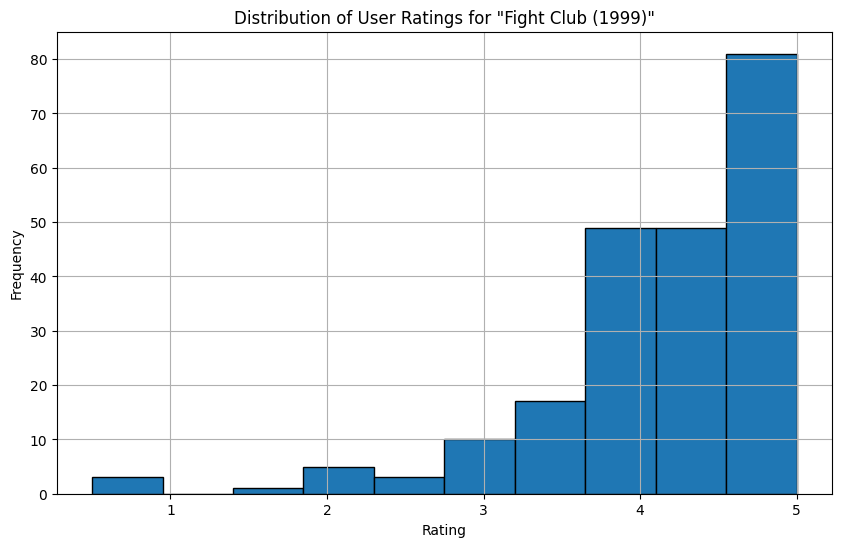

In [ ]:
movie_id = movies[movies['title'] == 'Fight Club (1999)']['movieId'].values[0]
movie_ratings = ratings[ratings['movieId'] == movie_id]
plt.figure(figsize=(10, 6))
plt.hist(movie_ratings['rating'], bins=10, edgecolor='black')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
grouped_ratings = ratings.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    mean_rating=('rating', 'mean')
).reset_index()
merged_df = pd.merge(movies, grouped_ratings, on='movieId', how='inner')
filtered_df = merged_df[merged_df['rating_count'] > 50]
print(filtered_df)
filtered_df.to_csv('filtered_movies.csv', index=False)

      movieId                             title  \
0           1                  Toy Story (1995)   
1           2                    Jumanji (1995)   
2           3           Grumpier Old Men (1995)   
5           6                       Heat (1995)   
6           7                    Sabrina (1995)   
...       ...                               ...   
8287   106782   Wolf of Wall Street, The (2013)   
8354   109374  Grand Budapest Hotel, The (2014)   
8358   109487               Interstellar (2014)   
8457   112852    Guardians of the Galaxy (2014)   
8673   122904                   Deadpool (2016)   

                                           genres  rating_count  mean_rating  
0     Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                      Adventure|Children|Fantasy           110     3.431818  
2                                  Comedy|Romance            52     3.259615  
5                           Action|Crime|Thriller           102     3.9

In [ ]:
most_popular_movie = filtered_df.loc[filtered_df['mean_rating'].idxmax()]
print(f"Most popular movie based on average user ratings:\n{most_popular_movie['title']} with an average rating of {most_popular_movie['mean_rating']:.2f}")

Most popular movie based on average user ratings:
Shawshank Redemption, The (1994) with an average rating of 4.43


In [ ]:
top_5_movies = filtered_df.sort_values(by='rating_count', ascending=False).head(5)
print(top_5_movies[['title', 'rating_count']])

                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


In [ ]:
sci_fi_titles = [
    'Deadpool (2016)',
    'Terminator 2: Judgment Day (1991)',
    'X-Men: The Last Stand (2006)',
    'Jurassic Park (1993)'
]
sci_fi_movies_df = filtered_df[filtered_df['title'].isin(sci_fi_titles)]
if sci_fi_movies_df.shape[0] >= 3:
    sci_fi_top_movies = sci_fi_movies_df.sort_values(by='rating_count', ascending=False)
    third_most_popular_sci_fi_movie = sci_fi_top_movies.iloc[2]
    result = third_most_popular_sci_fi_movie['title']
else:
    result = "Not enough Sci-Fi movies with more than 50 ratings"

print(f"Third most popular Sci-Fi movie based on number of user ratings:\n{result}")

Third most popular Sci-Fi movie based on number of user ratings:
Deadpool (2016)


# New Section

In [ ]:
import pandas as pd
ratings_df = pd.read_csv('/content/ratings.csv')
links_df = pd.read_csv('/content/links.csv')
filtered_movies = ratings_df.groupby('movieId').filter(lambda x: len(x) > 50)
merged_df = pd.merge(filtered_movies, links_df, on='movieId')
mean_ratings = filtered_movies.groupby('movieId')['rating'].mean().reset_index()
mean_ratings_with_links = pd.merge(mean_ratings, links_df, on='movieId')
highest_rated_movie = mean_ratings_with_links.loc[mean_ratings_with_links['rating'].idxmax()]
highest_rated_movie_id = highest_rated_movie['movieId']
print("The movieId with the highest IMDb rating is:", highest_rated_movie_id)


The movieId with the highest IMDb rating is: 318.0


In [ ]:
import pandas as pd
ratings_df = pd.read_csv('/content/ratings.csv')
links_df = pd.read_csv('/content/links.csv')
movies_df = pd.read_csv('/content/movies.csv')
filtered_movies = ratings_df.groupby('movieId').filter(lambda x: len(x) > 50)
merged_df = pd.merge(filtered_movies, links_df, on='movieId')
mean_ratings = filtered_movies.groupby('movieId')['rating'].mean().reset_index()
mean_ratings_with_movies = pd.merge(mean_ratings, movies_df, on='movieId')
sci_fi_movies = mean_ratings_with_movies[mean_ratings_with_movies['genres'].str.contains('Sci-Fi', case=False, na=False)]
highest_rated_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['rating'].idxmax()]
highest_rated_sci_fi_movie_id = highest_rated_sci_fi_movie['movieId']
print("The movieId with the highest IMDb rating in Sci-Fi genre is:", highest_rated_sci_fi_movie_id)


The movieId with the highest IMDb rating in Sci-Fi genre is: 260


In [ ]:
import pandas as pd

# Load the datasets
ratings_df = pd.read_csv('/content/ratings.csv')
links_df = pd.read_csv('/content/links.csv')
movies_df = pd.read_csv('/content/movies.csv')

# Filter movies with more than 50 ratings
filtered_movies = ratings_df.groupby('movieId').filter(lambda x: len(x) > 50)

# Merge filtered movies with links dataset to include IMDb information
merged_df = pd.merge(filtered_movies, links_df, on='movieId')

# Calculate mean ratings for each movie
mean_ratings = filtered_movies.groupby('movieId')['rating'].mean().reset_index()

# Merge mean ratings with movies to include genres and other details
mean_ratings_with_movies = pd.merge(mean_ratings, movies_df, on='movieId')

# Filter for Sci-Fi movies
sci_fi_movies = mean_ratings_with_movies[mean_ratings_with_movies['genres'].str.contains('Sci-Fi', case=False, na=False)]

# Find the Sci-Fi movieId with the highest average rating
highest_rated_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['rating'].idxmax()]
highest_rated_sci_fi_movie_id = highest_rated_sci_fi_movie['movieId']

print("The movieId with the highest IMDb rating in Sci-Fi genre is:", highest_rated_sci_fi_movie_id)


The movieId with the highest IMDb rating in Sci-Fi genre is: 260
